In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os,sys

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# go to File >> Share >> Publish to Web
# then instead of Publish "Entire Document", Select your Sheet name

# For example, this is the ENTIRE sheet's URL 
# For specific sheets, be sure to select the sheet name:

author = 'Kylor'
sheet_url = r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsm6rM8zQ-hC5-En8fpWHKD9Wx35oM0B6A73w8Jo_Sb9voA2bX3BF_hq8jyOiYqMMMMkgjvYoF4-q3/pub?gid=1061932637&single=true&output=csv'
# dfK= pd.read_csv(sheet_url,skiprows=1,skipfooter=3,engine='python')

author='Thamim'
sheet_url=r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsm6rM8zQ-hC5-En8fpWHKD9Wx35oM0B6A73w8Jo_Sb9voA2bX3BF_hq8jyOiYqMMMMkgjvYoF4-q3/pub?gid=1547686904&single=true&output=csv'
# dfT = pd.read_csv(sheet_url,skiprows=1,skipfooter=3,engine='python')

author='Shreeya'
sheet_url=r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsm6rM8zQ-hC5-En8fpWHKD9Wx35oM0B6A73w8Jo_Sb9voA2bX3BF_hq8jyOiYqMMMMkgjvYoF4-q3/pub?gid=1540749164&single=true&output=csv'
# dfS = pd.read_csv(sheet_url,skiprows=1,skipfooter=3,engine='python')


sheets = [r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsm6rM8zQ-hC5-En8fpWHKD9Wx35oM0B6A73w8Jo_Sb9voA2bX3BF_hq8jyOiYqMMMMkgjvYoF4-q3/pub?gid=1061932637&single=true&output=csv',
         r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsm6rM8zQ-hC5-En8fpWHKD9Wx35oM0B6A73w8Jo_Sb9voA2bX3BF_hq8jyOiYqMMMMkgjvYoF4-q3/pub?gid=1547686904&single=true&output=csv',
         r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsm6rM8zQ-hC5-En8fpWHKD9Wx35oM0B6A73w8Jo_Sb9voA2bX3BF_hq8jyOiYqMMMMkgjvYoF4-q3/pub?gid=1540749164&single=true&output=csv']
author = 'Everyone'


authors=['Kylor','Thamim','Shreeya']
all_df = list()
for S in range(len(sheets)):
    Sheet=sheets[S]
    tempauthor=authors[S]
    tempdf=pd.read_csv(Sheet,skiprows=1,skipfooter=3,engine='python')
    tempdf['author']=[tempauthor]*len(tempdf)
    all_df.append(tempdf)
all_df=pd.concat(all_df)
df=all_df
df['TIC ID']=df['TIC ID'].astype(int)


/Users/daxfeliz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/daxfeliz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df.columns

Index(['TIC ID', 'Notes', 'Planet Radius (Earth Radii)', 'Period (days)',
       'Transit Duration (hours)', 'Signal Detection Efficiency (SDE)',
       'Classification', 'Observed Sectors [String]', 'N Sectors Observed',
       'dist', 'ra', 'dec', 'eclat', 'eclong', 'Teff', 'logg', 'M_star',
       'R_star', 'rho', 'Tmag', 'Vmag', 'Gmag', 'rmag', 'imag', 'Zmag', 'Hmag',
       'Kmag', 'author'],
      dtype='object')

# In our algorithmic search, we attempted to produce lightcurves for each target but not each target had results. Meaning we did not search those targets. So any target that has a Not a Number (NaN) value for the orbital period is likely one of the targets we skipped

In [3]:
print('# of all targets:',len(df))
df = df[df['Period (days)'].notna()]
print('targets with LCs and BLS results:',len(df))

# of all targets: 1385
targets with LCs and BLS results: 1260


In [4]:
# df.loc[df['TIC ID']=='COUNT']
df.tail(1)

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,author
460,47973606,No clear sine like pattern or any dips. A striaght strected out lightcurve.,0.49501,1.895797,1.137602,7.313658,O,"Sector 14, Sector 15, Sector 19, Sector 22, Sector 25, Sector 26",6,20.4948,281.467689,52.461284,74.804281,297.526011,3295.0,5.14201,0.126,0.172,31.1335,12.5584,15.14,13.8468,NaN,NaN,NaN,10.485,10.229,Shreeya


In [5]:
# to make a pie chart, partial categories like PC/O can be a little tricky. 
# To be optimistic, let's ditch "/O" classifiers and rewrite them to have their first categories.

def drop_slash_O(df_orig):
    df=df_orig.copy(deep=True)
    # replace Other with O
    old_classifier='Other'
    new_classifier='O'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    #replace PC/SV with PC
    old_classifier='PC/SV'
    new_classifier='PC'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)
    #replace SV/PC with PC
    old_classifier='SV/PC'
    new_classifier='PC'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    #     
    #replace PC/EB with PC
    old_classifier='PC/EB'
    new_classifier='PC'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    #replace SV/EB with SV
    old_classifier='SV/EB'
    new_classifier='SV'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)        
    #replace EB/SV with SV
    old_classifier='EB/SV'
    new_classifier='SV'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)            
    #replace PC/O with PC
    old_classifier='PC/O'
    new_classifier='PC'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)
    #replace PC/O with PC
    old_classifier='O/PC'
    new_classifier='PC'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    #replace PC/O with PC
    old_classifier='PC/Other'
    new_classifier='PC'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    # 
    # replace EB/O with EB
    old_classifier='EB/O'
    new_classifier='EB'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)
    #
    # replace SV/O with SV
    old_classifier='SV/O'
    new_classifier='SV'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)
    # replace O/SV with SV
    old_classifier='O/SV'
    new_classifier='SV'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    # replace SV/O with EB
    old_classifier='SV/Other'
    new_classifier='SV'
    df['Classification']=df['Classification'].mask(df['Classification'] == old_classifier, new_classifier)    
    
    return df
    
    
    
new_df= drop_slash_O(df)
# new_dfK= drop_slash_O(dfK)
# new_dfT= drop_slash_O(dfT)
# new_dfS= drop_slash_O(dfS)
# new_dfK.head(3)

In [6]:
print(list(set(new_df['Classification'])))

# print('')
# print(list(set(new_dfK['Classification'])))
# print(list(set(new_dfT['Classification'])))
# print(list(set(new_dfS['Classification'])))


[nan, 'PC', 'SV', 'O', 'EB']


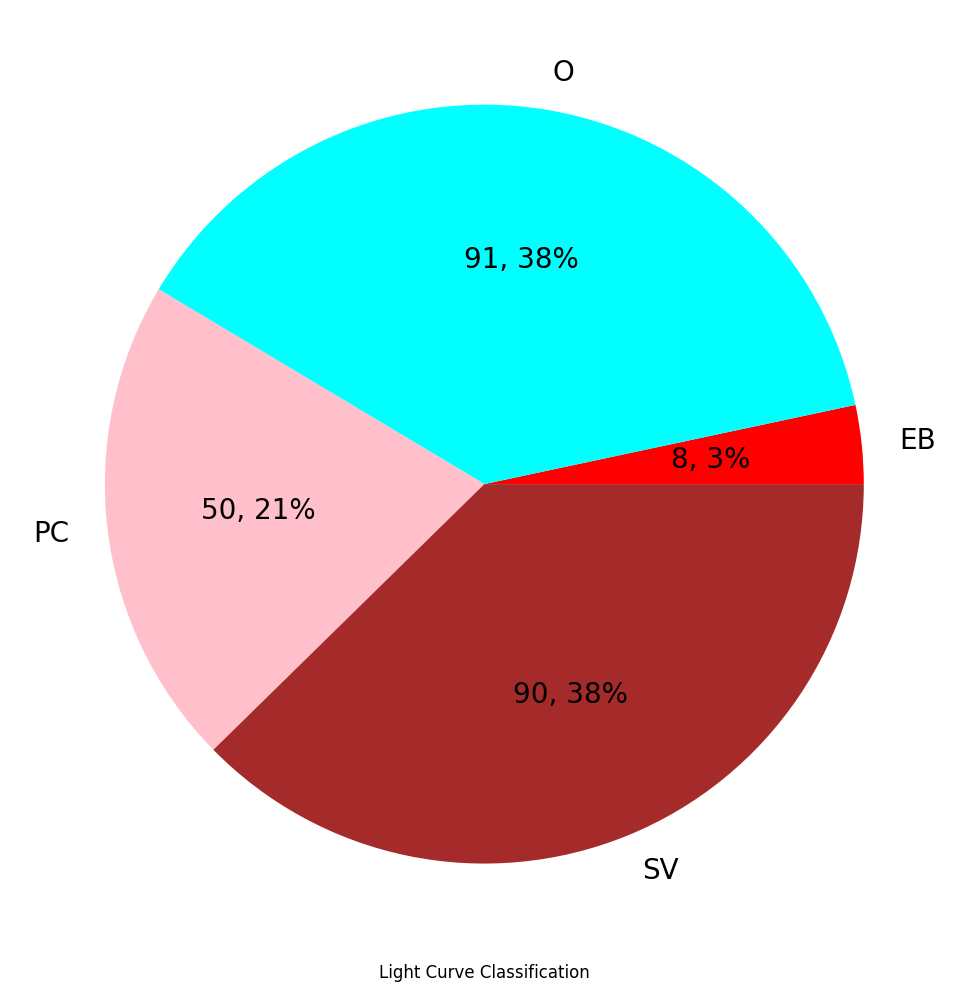

In [7]:
def create_pie_chart_with_pandas(df_orig,author):
    df=df_orig.copy(deep=True)
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    
    # only consider rows that have entires in 'Classification' column
    df = df[df['Classification'].notna()] #ignore ones not voted on for now

    def label_function(val):
        return f'{val / 100 * len(df):.0f}, {val:.0f}%'


    fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 10))

    df.groupby('Classification').size().plot(kind='pie',ax=ax1,colors=['red','cyan','pink','brown'],\
                                             autopct=label_function, \
                                             textprops={'fontsize': 20})
    ax1.set_xlabel('Light Curve Classification', size=12)
    plt.tight_layout(pad=1)
    plt.savefig(author+"'s_classification_pie_chart.png",bbox_inches='tight')
    plt.show()
create_pie_chart_with_pandas(new_df,author)

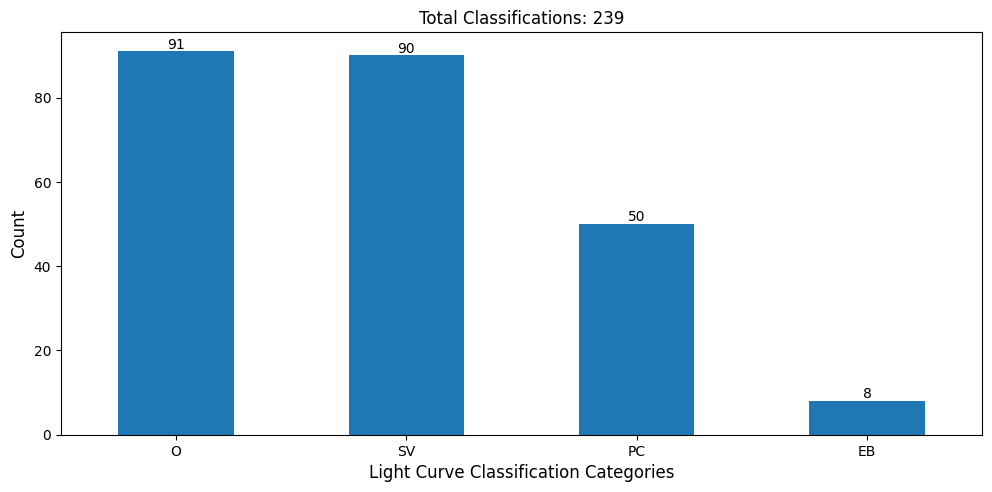

In [8]:
def create_bar_graph_with_pandas(df_orig,author):
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    df=df_orig.copy(deep=True)
    # only consider rows that have entires in 'Classification' column
    df = df[df['Classification'].notna()] #ignore ones not voted on for now

    fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
    
    ax1 = df['Classification'].value_counts().plot(kind='bar',rot=0)
    # adding numbers above bars for total count
    for container in ax1.containers:
        ax1.bar_label(container)
    
    ax1.set_xlabel('Light Curve Classification Categories', size=12,labelpad=4)
    ax1.set_ylabel('Count', size=12)    
    ax1.set_title('Total Classifications: '+str(len(df)))
    plt.tight_layout(pad=1)
    plt.savefig(author+"'s_classification_bar_graph.png",bbox_inches='tight')    
    plt.show()
    
    
create_bar_graph_with_pandas(new_df,author)

Kylor Classification
SV    38
O     25
PC    18
EB     6
Name: count, dtype: int64
Thamim Classification
O     29
PC    17
SV     4
EB     2
Name: count, dtype: int64
Shreeya Classification
SV    48
O     37
PC    15
Name: count, dtype: int64


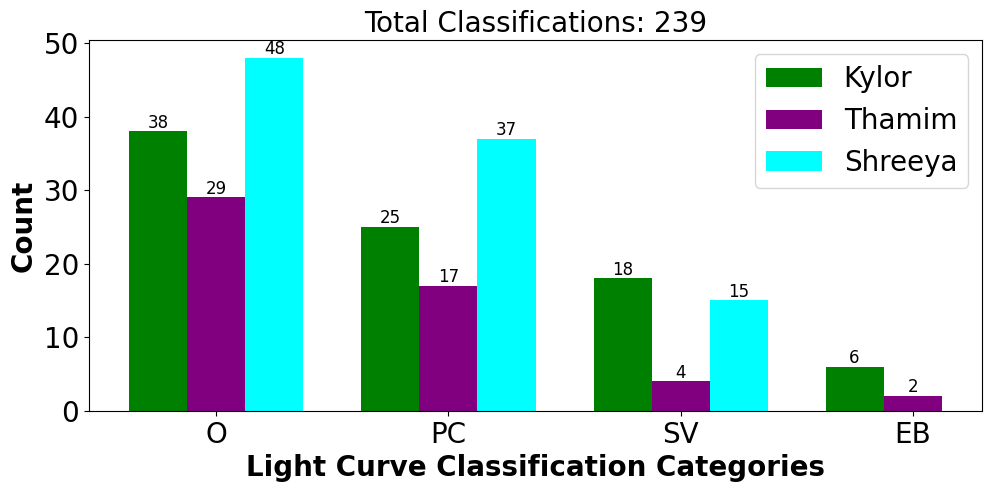

In [9]:
def create_bar_graph_with_pandas_combo(df_orig,K_color,T_color,S_color,author='Everyone'):
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    # only consider rows that have entires in 'Classification' column
    
    df=df_orig.copy(deep=True)
    
    dfK=df.loc[df['author']=='Kylor']
    dfT=df.loc[df['author']=='Thamim']
    dfS=df.loc[df['author']=='Shreeya']
    
    dfK = dfK[dfK['Classification'].notna()] #ignore ones not voted on for now
    dfT = dfT[dfT['Classification'].notna()] #ignore ones not voted on for now
    dfS = dfS[dfS['Classification'].notna()] #ignore ones not voted on for now

    fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
    
#     ax1 = dfA['Classification'].value_counts().plot(kind='bar',rot=0,color='red',label='August')
#     dfD['Classification'].value_counts().plot(kind='bar',rot=0,ax=ax1,color='green',label='Donovan',sharex=True,stacked=False)
#     dfJ['Classification'].value_counts().plot(kind='bar',rot=0,ax=ax1,color='blue',label='Jashcelyn',sharex=True,stacked=True)
    
    w = 0.25
    x = np.array([0,1,2,3])
    K = dfK['Classification'].value_counts()
    T = dfT['Classification'].value_counts()
    S = dfS['Classification'].value_counts()
    
    print('Kylor',K)
    print('Thamim',T)
    print('Shreeya',S)
    
    ax1.bar(np.arange(0,len(K),1)-w, K, width=w, color=K_color,label='Kylor', align='center')

    ax1.bar(np.arange(0,len(T),1), T, width=w, color=T_color,label='Thamim', align='center')
    ax1.bar(np.arange(0,len(S),1)+w, S, width=w, color=S_color,label='Shreeya', align='center')
    
    
#     ax1.bar_label(ax1.containers[0])
#     ax1.bar_label(ax1.containers[1])
#     ax1.bar_label(ax1.containers[2])    
    
#     adding numbers above bars for total count
    for container in ax1.containers:
        ax1.bar_label(container,fontsize=12)
    ax1.set_xticks([0,1,2,3])
    ax1.set_xticklabels(['O','PC','SV','EB'])
    ax1.tick_params(axis='both', labelsize=20)
    
    ax1.set_xlabel('Light Curve Classification Categories', size=20,labelpad=4,weight='bold')    
    ax1.set_ylabel('Count', size=20,weight='bold')    
    ax1.set_title('Total Classifications: '+str(len(dfK)+len(dfT)+len(dfS)),fontsize=20)
    ax1.legend(loc='upper right',fontsize=20)
    plt.tight_layout(pad=1)
    plt.savefig(author+"'s_classification_bar_graph.png",bbox_inches='tight')    
    plt.show()
    

    
K_color='green';T_color='purple';S_color='cyan'
create_bar_graph_with_pandas_combo(new_df,author='Everyone',
                                  K_color='green',T_color='purple',S_color='cyan')

# For Dax Only, with input catalogs, what is the Truth distribution?

In [10]:
live_update=False

if live_update==True:
    TOIs = pd.read_csv('https://tev.mit.edu/data/collection/193/csv/6/',sep=',', comment='#')
    print(len(TOIs))
    TOIs.to_csv('TOI_Catalog.csv')
    #CTOIs =  pd.read_csv('https://exofop.ipac.caltech.edu/tess/download_ctoi.php?sort=ctoi&output=csv')
    #nasa_url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps+where+tran_flag+=+1+order+by+pl_name+desc+&format=csv"
    #NASA_df = pd.read_csv(nasa_url,sep=',', comment='#')
    #NASA_df=NASA_df.drop_duplicates('pl_name', keep='first').reset_index(drop=True)
    
    TESS_EBs = pd.read_csv('/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/Catalogs/TESS_EB_Catalog_2022-04-03.csv')
    TESS_EBs.to_csv('TESS_EB_Catalog.csv')
    print(len(TESS_EBs))

    Mearths = pd.read_csv('/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/Catalogs/Mearth_Newton_2015_2018_combined.csv')
    Mearths.to_csv('Mearth_Newton_2015_2018_combined.csv')
    print(len(Mearths))
    
else:

    TOIs = pd.read_csv('TOI_Catalog.csv')
    print(len(TOIs))
    TOIs=TOIs.rename(columns={'TIC': 'TIC ID'})
    TOIs['TIC ID']=TOIs['TIC ID'].astype(int)

    TESS_EBs = pd.read_csv('TESS_EB_Catalog.csv')
    print(len(TESS_EBs))

    Mearths = pd.read_csv('Mearth_Newton_2015_2018_combined.csv')
    print(len(Mearths))

PCs = new_df.loc[new_df['Classification']=='PC'].reset_index(drop=True)
SVs = new_df.loc[new_df['Classification']=='SV'].reset_index(drop=True)
EBs = new_df.loc[new_df['Classification']=='EB'].reset_index(drop=True)

PCs['TIC ID']=PCs['TIC ID'].astype(int)
SVs['TIC ID']=SVs['TIC ID'].astype(int)
EBs['TIC ID']=EBs['TIC ID'].astype(int)

print(len(PCs),len(EBs),len(SVs))

matched_PCs_with_TOIs = pd.merge(PCs, TOIs, on=['TIC ID'], how='inner')
matched_PCs_with_TESS_EBs = pd.merge(PCs, TESS_EBs, on=['TIC ID'], how='inner')
matched_PCs_with_Mearths = pd.merge(PCs, Mearths, on=['TIC ID'], how='inner')

print('PC matches in TOI Catlog: ', len(matched_PCs_with_TOIs))
print('PC matches in TESS EB Catlog: ', len(matched_PCs_with_TESS_EBs))
print('PC matches in Mearth Catlog: ', len(matched_PCs_with_Mearths))


matched_EBs_with_TOIs = pd.merge(EBs, TOIs, on=['TIC ID'], how='inner')
matched_EBs_with_TESS_EBs = pd.merge(EBs, TESS_EBs, on=['TIC ID'], how='inner')
matched_EBs_with_Mearths = pd.merge(EBs, Mearths, on=['TIC ID'], how='inner')

print('EB matches in TOI Catlog: ', len(matched_EBs_with_TOIs))
print('EB matches in TESS EB Catlog: ', len(matched_EBs_with_TESS_EBs))
print('EB matches in Mearth Catlog: ', len(matched_EBs_with_Mearths))

matched_SVs_with_TOIs = pd.merge(SVs, TOIs, on=['TIC ID'], how='inner')
matched_SVs_with_TESS_EBs = pd.merge(SVs, TESS_EBs, on=['TIC ID'], how='inner')
matched_SVs_with_Mearths = pd.merge(SVs, Mearths, on=['TIC ID'], how='inner')

print('SV matches in TOI Catlog: ', len(matched_SVs_with_TOIs))
print('SV matches in TESS EB Catlog: ', len(matched_SVs_with_TESS_EBs))
print('SV matches in Mearth Catlog: ', len(matched_SVs_with_Mearths))


7147
4578
2299
50 8 90
PC matches in TOI Catlog:  23
PC matches in TESS EB Catlog:  3
PC matches in Mearth Catlog:  36
EB matches in TOI Catlog:  4
EB matches in TESS EB Catlog:  4
EB matches in Mearth Catlog:  5
SV matches in TOI Catlog:  12
SV matches in TESS EB Catlog:  2
SV matches in Mearth Catlog:  82


# Are any of the found PCs (TOIs) in the habitable zone?

In [11]:
# new_dfK['TIC ID']=new_dfK['TIC ID'].astype(int)
# new_dfT['TIC ID']=new_dfT['TIC ID'].astype(int)
# new_dfS['TIC ID']=new_dfS['TIC ID'].astype(int)


# matched_PCs_with_TOIs_K = pd.merge(new_dfK.loc[new_dfK['Classification']=='PC'], TOIs, on=['TIC ID'], how='inner')
# matched_PCs_with_TOIs_T = pd.merge(new_dfT.loc[new_dfT['Classification']=='PC'], TOIs, on=['TIC ID'], how='inner')
# matched_PCs_with_TOIs_S = pd.merge(new_dfS.loc[new_dfS['Classification']=='PC'], TOIs, on=['TIC ID'], how='inner')

# matched_PCs_with_EBs_K = pd.merge(new_dfK.loc[new_dfK['Classification']=='PC'], EBs, on=['TIC ID'], how='inner')
# matched_PCs_with_EBs_T = pd.merge(new_dfT.loc[new_dfT['Classification']=='PC'], EBs, on=['TIC ID'], how='inner')
# matched_PCs_with_EBs_S = pd.merge(new_dfS.loc[new_dfS['Classification']=='PC'], EBs, on=['TIC ID'], how='inner')

# matched_PCs_with_SVs_K = pd.merge(new_dfK.loc[new_dfK['Classification']=='PC'], SVs, on=['TIC ID'], how='inner')
# matched_PCs_with_SVs_T = pd.merge(new_dfT.loc[new_dfT['Classification']=='PC'], SVs, on=['TIC ID'], how='inner')
# matched_PCs_with_SVs_S = pd.merge(new_dfS.loc[new_dfS['Classification']=='PC'], SVs, on=['TIC ID'], how='inner')

# print('Total TOI PC matches:',len(matched_PCs_with_TOIs_K)+len(matched_PCs_with_TOIs_T)+len(matched_PCs_with_TOIs_S))
# print('Total EB PC matches:',len(matched_PCs_with_EBs_K)+len(matched_PCs_with_EBs_T)+len(matched_PCs_with_EBs_S))
# print('Total SV PC matches:',len(matched_PCs_with_SVs_K)+len(matched_PCs_with_SVs_T)+len(matched_PCs_with_SVs_S))


In [12]:
def ID_period_and_radius_matching(matched_category_with_TOIs,percent_match):
    import numpy as np
    match_flag = []
    for ii in range(len(matched_category_with_TOIs)):
        
        detected_period = matched_category_with_TOIs['Period (days)'][ii]
        detected_radius = matched_category_with_TOIs['Planet Radius (Earth Radii)'][ii]
        catalog_period =  matched_category_with_TOIs['Orbital Period Value'][ii]
        catalog_radius =  matched_category_with_TOIs['Planet Radius Value'][ii]
        
        if (
            detected_period >= catalog_period-catalog_period*percent_match) &\
        (detected_period <= catalog_period+catalog_period*percent_match) &\
        (detected_radius >= catalog_radius-catalog_radius*percent_match) &\
        (detected_radius <= catalog_radius+catalog_radius*percent_match
        ):
            match_flag = np.append(match_flag,'Y')
            
        else:
            match_flag = np.append(match_flag,'N')
            
    matched_category_with_TOIs['catalog_match'] = match_flag
    
    #now filter for ONLY Y
    successful_TOI_detections = matched_category_with_TOIs.loc[matched_category_with_TOIs['catalog_match']=='Y']
    #
    return matched_category_with_TOIs, successful_TOI_detections

# matched_PCs_with_TOIs_K2, successful_PC_TOI_detections_K2 = ID_period_and_radius_matching(matched_PCs_with_TOIs_K,\
#                                                                                           percent_match=25/100)

# matched_PCs_with_TOIs_T2, successful_PC_TOI_detections_T2 = ID_period_and_radius_matching(matched_PCs_with_TOIs_T,\
#                                                                                           percent_match=25/100)

# matched_PCs_with_TOIs_S2, successful_PC_TOI_detections_S2 = ID_period_and_radius_matching(matched_PCs_with_TOIs_S,\
#                                                                                           percent_match=25/100)


matched_PCs_with_TOIs, successful_PC_TOI_detections = ID_period_and_radius_matching(matched_PCs_with_TOIs,\
                                                                                          percent_match=25/100)
#drop duplicates with same TIC ID and measured BLS period
matched_PCs_with_TOIs2 = matched_PCs_with_TOIs.drop_duplicates(["TIC ID","Period (days)"])
successful_PC_TOI_detections2 = successful_PC_TOI_detections.drop_duplicates(["TIC ID","Period (days)"])



successful_PC_TOI_detections_K2 = successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Kylor']
successful_PC_TOI_detections_T2 = successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Thamim']
successful_PC_TOI_detections_S2 = successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Shreeya']



# new detections not in TOI/EB/SV catalogs

In [13]:
newPCs= new_df[~(new_df['TIC ID'].isin(TOIs['TIC ID']) 
                 | new_df['TIC ID'].isin(SVs['TIC ID']) 
                 | new_df['TIC ID'].isin(EBs['TIC ID']))].reset_index(drop=True)
newPCs=newPCs.loc[newPCs['Classification']=='PC'].reset_index(drop=True)
newPCs

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,author
0,258770842,"Two stars in image, No clear transit. Orange line is relatively linear.",1.214739,4.430078,1.748131,4.018314,PC,Sector 17,1,30.76710,10.481022,13.687939,8.441676,15.016276,3303.0,4.90241,0.241000,0.255000,9.05349,11.72810,14.297,13.01380,13.7067,15.4552,11.5232,9.574,9.347,Kylor
1,453002670,Very straight orange line. Three stars in view. Clear but minor dips in the graphs.,1.069764,7.734371,2.330601,8.500327,PC,Sector 7,1,19.36210,122.700210,1.153254,-18.433217,124.704599,3040.0,5.08932,0.210000,0.232000,24.00990,12.48340,15.694,13.93230,15.0260,13.4922,12.2519,10.060,9.744,Kylor
2,453000845,Two stars in view. Unclear figures. There are some minor transit events but they are not extremely consistent,1.000152,5.797698,1.508037,6.295953,PC,Sector 7,1,21.89590,122.723440,3.976002,-15.677551,124.064188,3288.0,4.86302,0.326000,0.322000,7.36435,10.86600,13.453,12.15740,15.6566,11.5221,11.3515,8.568,8.293,Kylor
3,168726017,The bottom graph shows a very clear dip that is slightly cut off. Single transit event.,3.296454,15.084341,1.980360,9.627781,PC,"Sector 4, Sector 5",2,18.05110,62.231669,-31.481631,-51.195952,50.651869,3131.0,4.98299,0.185000,0.214000,13.88980,11.62030,14.517,13.04340,NaN,NaN,NaN,9.164,8.823,Kylor
4,262605041,Clear dips in the second half of the diagram not in the first half (Inconsistent). Large star in view.,1.984366,1.833305,1.321810,10.311407,PC,Sector 8,1,93.46420,132.351527,1.772066,-15.393990,134.299739,3308.0,4.76962,0.188865,0.219711,4.63019,13.18850,15.360,14.47860,15.1103,14.0775,12.9861,11.005,10.728,Kylor
5,266744225,Sinuisodal flux - rotating star. Patterns seen in the relative flux diagrams. Clear dip in the data.,1.204642,8.100002,2.879437,7.086688,PC,Sector 7,1,5.98632,116.167386,3.552466,-17.425960,117.472326,3181.0,4.89065,0.308000,0.308000,8.50828,8.33732,11.190,9.68066,NaN,NaN,NaN,6.005,5.698,Kylor
6,138959018,Orange line is pretty linear. There is a very minor drop in the lightcurve graph. The SDE is below 6 so it is harder to classify.,1.397677,7.948356,1.779644,5.189557,PC,Sector 22,1,46.06443,188.084640,31.599923,31.896997,173.335569,3421.0,4.74645,0.420000,0.401000,4.15403,10.89590,13.165,12.09910,12.7855,11.5510,12.0627,8.780,8.492,Kylor
7,240821194,Two stars in view. Strange dip around time=1790,0.642007,5.839746,1.876589,5.505490,PC,"Sector 17, Sector 18",2,21.79200,15.744734,53.068826,41.954607,38.954986,2972.0,5.15675,0.096000,0.151000,33.44280,13.17510,16.820,14.66120,NaN,NaN,NaN,10.794,10.464,Kylor
8,99028319,Gap in the time of exposure. Resulting in a clear space between parts of the graphs. Slight transit events occuring at the blue lines.,5.383608,4.699269,2.301881,28.067010,PC,Sector 10,1,38.98080,181.303512,-25.565019,-22.815358,191.926185,3426.0,4.70866,0.113710,0.140178,3.49841,10.80650,13.091,12.00880,NaN,NaN,NaN,8.661,8.399,Kylor
9,209366972,Sinusoidal figures througout all of the graphs. Orange line holds consistant pattern.,1.701567,0.525631,2.935278,12.132894,PC,Sector 2,1,26.58930,338.982341,-24.046895,-14.097706,331.513308,3203.0,4.99899,0.211000,0.232000,15.11050,12.33500,15.109,13.67960,NaN,NaN,NaN,10.085,9.785,Kylor


In [14]:
# successful_PC_TOI_detections[['Period (days)','Orbital Period Value']]#.head(1)
successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Kylor']

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,author,Unnamed: 0,Parameter Source Pipeline,Detection Pipeline(s),Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TIC Right Ascension 2015.5,TIC Declination 2015.5,TMag Value,TMag Uncertainty,Epoch Value,Epoch Error,Orbital Period Value,Orbital Period Error,Transit Duration Value,Transit Duration Error,Transit Depth Value,Transit Depth Error,Sectors,Public Comment,Surface Gravity Value,Surface Gravity Uncertainty,Signal ID,Star Radius Value,Star Radius Error,Planet Radius Value,Planet Radius Error,Planet Equilibrium Temperature (K) Value,Effective Temperature Value,Effective Temperature Uncertainty,Effective Stellar Flux Value,Signal-to-noise,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated,catalog_match
0,161032923,"Two stars in view. Linear orange line. The data decreases all together however, it is a little unclear.",1.111898,3.963602,1.478424,8.766617,PC,Sector 13,1,25.5590,276.370224,-52.214273,-28.873405,274.45248,3227.0,5.06391,NaN,0.284000,21.12710,12.7067,15.349,14.0343,NaN,NaN,NaN,10.467,10.170,Kylor,1654,spoc-s01-s69-b0A-PC,SPOC,1080.01,PC,276.3702,-52.2143,276.368325,-52.214573,12.681,0.058,1654.060577,0.001219,3.965248,0.000012,1.011259,0.574047,3680.754444,458.06815,"[13, 66]",L1 candidate,4.96636,0.407584,1,0.199988,0.005981,1.230510,1.058385,386.668477,3296.0,64.0,5.282945,8.871182,False,2,4,1,1,4,4,4,2019-08-16 20:20:43+00,2024-04-24 15:21:38+00,Y
5,259377017,Very clear star in view. The SDE is very high. Very clear transits and dips at the blue lines. Consistent.,2.319184,5.660420,1.592712,30.226660,PC,"Sector 3, Sector 4, Sector 5",3,22.4793,68.415501,-51.956232,-71.897024,43.14687,3532.0,4.85053,NaN,0.374358,6.90519,10.4981,12.603,11.6306,NaN,NaN,NaN,8.531,8.251,Kylor,5628,spoc-s01-s36-b0A-CPKP,UNKNOWN,270.01,CP,68.4154,-51.9562,68.416080,-51.957394,10.416,0.040,2198.961454,0.000528,5.660569,0.000004,1.663170,0.052896,3856.106085,66.09782,"[3, 4, 5, 30, 32]",TOI-270 c / TOI 270.01,4.83982,0.382963,1,0.374358,0.011496,2.407087,0.119732,452.870923,3551.0,74.0,9.940741,51.137700,False,5,5,5,5,5,5,5,2019-05-17 18:40:33+00,2021-10-14 20:28:36+00,Y
10,259377017,Clear Transit. Patterns throughout all diagrams. Linear-ish orange line,2.319184,5.660420,1.592712,30.226660,PC,"Sector 3, Sector 4, Sector 5",3,22.4793,68.415501,-51.956232,-71.897024,43.14687,3532.0,4.85053,NaN,0.374358,6.90519,10.4981,12.603,11.6306,NaN,NaN,NaN,8.531,8.251,Kylor,5628,spoc-s01-s36-b0A-CPKP,UNKNOWN,270.01,CP,68.4154,-51.9562,68.416080,-51.957394,10.416,0.040,2198.961454,0.000528,5.660569,0.000004,1.663170,0.052896,3856.106085,66.09782,"[3, 4, 5, 30, 32]",TOI-270 c / TOI 270.01,4.83982,0.382963,1,0.374358,0.011496,2.407087,0.119732,452.870923,3551.0,74.0,9.940741,51.137700,False,5,5,5,5,5,5,5,2019-05-17 18:40:33+00,2021-10-14 20:28:36+00,Y


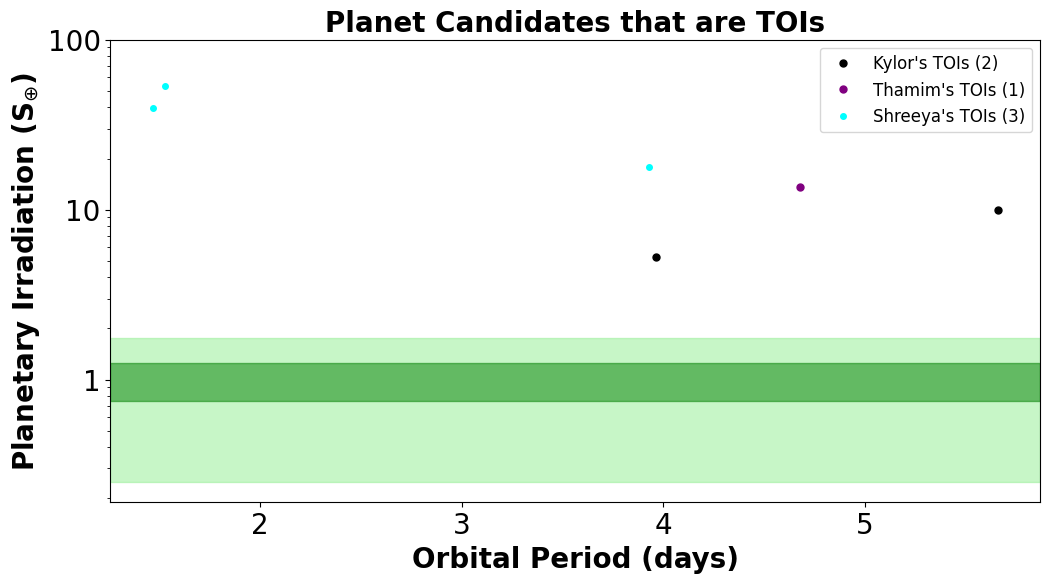

In [15]:
plt.figure(figsize=(12,6))
plt.plot(successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Kylor']['Period (days)'],
         successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Kylor']['Effective Stellar Flux Value'],
         marker='o',color='black',linestyle='none',
         label="Kylor's TOIs ("+str( len(np.unique(successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Kylor']['TIC ID'])) )+")",zorder=10,markersize=5)

plt.plot(successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Thamim']['Period (days)'],
         successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Thamim']['Effective Stellar Flux Value'],
         marker='o',color=T_color,linestyle='none',
         label="Thamim's TOIs ("+str( len(np.unique(successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Thamim']['TIC ID'])) )+")",zorder=10,markersize=5)

plt.plot(successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Shreeya']['Period (days)'],
         successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Shreeya']['Effective Stellar Flux Value'],
         marker='o',color=S_color,linestyle='none',
         label="Shreeya's TOIs ("+str( len(np.unique(successful_PC_TOI_detections2.loc[successful_PC_TOI_detections2['author']=='Shreeya']['TIC ID'])) )+")",zorder=10,markersize=4)


# plt.plot(successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Kylor']['Period (days)'],
#          successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Kylor']['Effective Stellar Flux Value'],
#          marker='o',color='black',linestyle='none',
#          label="Kylor's TOIs ("+str( len(np.unique(successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Kylor']['TIC ID'])) )+")",zorder=10,markersize=5)

# plt.plot(successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Thamim']['Period (days)'],
#          successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Thamim']['Effective Stellar Flux Value'],
#          marker='o',color=T_color,linestyle='none',
#          label="Thamim's TOIs ("+str( len(np.unique(successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Thamim']['TIC ID'])) )+")",zorder=10,markersize=5)

# plt.plot(successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Shreeya']['Period (days)'],
#          successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Shreeya']['Effective Stellar Flux Value'],
#          marker='o',color=S_color,linestyle='none',
#          label="Shreeya's TOIs ("+str( len(np.unique(successful_PC_TOI_detections.loc[successful_PC_TOI_detections['author']=='Shreeya']['TIC ID'])) )+")",zorder=10,markersize=4)

plt.xlabel('Orbital Period (days)',fontsize=20,weight='bold')
plt.ylabel(r'Planetary Irradiation (S$_{\oplus}$)',fontsize=20,weight='bold')
plt.axhspan(ymin=1-0.75,ymax=1+0.75,color='lightgreen',alpha=0.5)
plt.axhspan(ymin=1-0.25,ymax=1+0.25,color='green',alpha=0.5)

# plt.text(s='Conservative Habitable Zone',x=4, y=0.825,fontsize=20,weight='bold')
# plt.arrow(3.5, 0.75, 0, 0.45, head_width=0.05, head_length=0.03, linewidth=4, color='black', length_includes_head=True)
# plt.arrow(3.5, 0.75, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=4, color='black', length_includes_head=True)

# plt.text(s='Optimistic Habitable Zone',x=4, y=0.4,fontsize=20,weight='bold')
# plt.arrow(11, 0.45, 0, 1.25, head_width=0.05, head_length=0.075, linewidth=5, color='black', length_includes_head=True)
# plt.arrow(11, 0.45, 0, -0.175, head_width=0.05, head_length=0.0253, linewidth=5, color='black', length_includes_head=True)

xpos=0.1
# plt.text(s='Conservative Habitable Zone',x=xpos, y=0.825,fontsize=12,weight='bold')
# plt.arrow(xpos-.5, 0.75, 0, 0.45, head_width=0.05, head_length=0.03, linewidth=4, color='green', length_includes_head=True)
# plt.arrow(xpos-.5, 0.75, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=4, color='green', length_includes_head=True)
# plt.arrow(xpos-.5, 0.75, 0, 0.45, head_width=0.05, head_length=0.03, linewidth=0.5, color='black', length_includes_head=True)
# plt.arrow(xpos-.5, 0.75, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=0.5, color='black', length_includes_head=True)

# plt.text(s='Optimistic Habitable Zone',x=xpos-0.75, y=0.4,fontsize=12,weight='bold')
# # plt.arrow(11, 0.45, 0, 1.25, head_width=0.05, head_length=0.075, linewidth=5, color='black', length_includes_head=True)
# # plt.arrow(11, 0.45, 0, -0.175, head_width=0.05, head_length=0.0253, linewidth=5, color='black', length_includes_head=True)
# plt.arrow(xpos-1, 0.25, 0, 1.5, head_width=0.05, head_length=0.03, linewidth=4, color='lightgreen', length_includes_head=True)
# plt.arrow(xpos-1, 0.25, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=4, color='lightgreen', length_includes_head=True)
# plt.arrow(xpos-1, 0.25, 0, 1.5, head_width=0.05, head_length=0.03, linewidth=2, color='black', length_includes_head=True)
# plt.arrow(xpos-1, 0.25, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=2, color='black', length_includes_head=True)


plt.tick_params(axis='both', labelsize=20)
plt.yscale('log')
plt.yticks([1,10,100])
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(loc='upper right',fontsize=12)
plt.title('Planet Candidates that are TOIs',fontsize=20,weight='bold')
plt.savefig("Everyone's_habitable_zone_PCs.png",bbox_inches='tight')
plt.show()

In [16]:
successful_PC_TOI_detections_K2#.head(1)

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,author,Unnamed: 0,Parameter Source Pipeline,Detection Pipeline(s),Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TIC Right Ascension 2015.5,TIC Declination 2015.5,TMag Value,TMag Uncertainty,Epoch Value,Epoch Error,Orbital Period Value,Orbital Period Error,Transit Duration Value,Transit Duration Error,Transit Depth Value,Transit Depth Error,Sectors,Public Comment,Surface Gravity Value,Surface Gravity Uncertainty,Signal ID,Star Radius Value,Star Radius Error,Planet Radius Value,Planet Radius Error,Planet Equilibrium Temperature (K) Value,Effective Temperature Value,Effective Temperature Uncertainty,Effective Stellar Flux Value,Signal-to-noise,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated,catalog_match
0,161032923,"Two stars in view. Linear orange line. The data decreases all together however, it is a little unclear.",1.111898,3.963602,1.478424,8.766617,PC,Sector 13,1,25.5590,276.370224,-52.214273,-28.873405,274.45248,3227.0,5.06391,NaN,0.284000,21.12710,12.7067,15.349,14.0343,NaN,NaN,NaN,10.467,10.170,Kylor,1654,spoc-s01-s69-b0A-PC,SPOC,1080.01,PC,276.3702,-52.2143,276.368325,-52.214573,12.681,0.058,1654.060577,0.001219,3.965248,0.000012,1.011259,0.574047,3680.754444,458.06815,"[13, 66]",L1 candidate,4.96636,0.407584,1,0.199988,0.005981,1.230510,1.058385,386.668477,3296.0,64.0,5.282945,8.871182,False,2,4,1,1,4,4,4,2019-08-16 20:20:43+00,2024-04-24 15:21:38+00,Y
5,259377017,Very clear star in view. The SDE is very high. Very clear transits and dips at the blue lines. Consistent.,2.319184,5.660420,1.592712,30.226660,PC,"Sector 3, Sector 4, Sector 5",3,22.4793,68.415501,-51.956232,-71.897024,43.14687,3532.0,4.85053,NaN,0.374358,6.90519,10.4981,12.603,11.6306,NaN,NaN,NaN,8.531,8.251,Kylor,5628,spoc-s01-s36-b0A-CPKP,UNKNOWN,270.01,CP,68.4154,-51.9562,68.416080,-51.957394,10.416,0.040,2198.961454,0.000528,5.660569,0.000004,1.663170,0.052896,3856.106085,66.09782,"[3, 4, 5, 30, 32]",TOI-270 c / TOI 270.01,4.83982,0.382963,1,0.374358,0.011496,2.407087,0.119732,452.870923,3551.0,74.0,9.940741,51.137700,False,5,5,5,5,5,5,5,2019-05-17 18:40:33+00,2021-10-14 20:28:36+00,Y


In [17]:
successful_PC_TOI_detections_S2

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,author,Unnamed: 0,Parameter Source Pipeline,Detection Pipeline(s),Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TIC Right Ascension 2015.5,TIC Declination 2015.5,TMag Value,TMag Uncertainty,Epoch Value,Epoch Error,Orbital Period Value,Orbital Period Error,Transit Duration Value,Transit Duration Error,Transit Depth Value,Transit Depth Error,Sectors,Public Comment,Surface Gravity Value,Surface Gravity Uncertainty,Signal ID,Star Radius Value,Star Radius Error,Planet Radius Value,Planet Radius Error,Planet Equilibrium Temperature (K) Value,Effective Temperature Value,Effective Temperature Uncertainty,Effective Stellar Flux Value,Signal-to-noise,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated,catalog_match
12,198385543,There is another star that is interfering. The signal is big but the trend is very subtle sp of there is anything there it's very small. The period os alsp very small.,1.721315,3.930845,1.251386,37.442268,PC,"Sector 16, Sector 17, Sector 20, Sector 23, Sector 24, Sector 25, Sector 26",7,47.24960,257.955422,54.526939,76.641403,238.390516,3512.0,4.81618,NaN,0.41,5.80494,11.8467,13.971,12.9919,NaN,NaN,NaN,9.804,9.596,Shreeya,2256,spoc-s14-s55-b0A-PC,SPOC,1846.01,PC,257.955422,54.526939,257.954965,54.527848,11.8467,0.007532,2884.349803,0.002557,3.930675,0.000007,1.430514,0.158836,1637.198427,85.50518,"[17, 20, 23, 24, 25, 26, 40, 47, 50, 51, 52, 53, 54, 58]",L1 candidate; possible secondary at phase 0.3; two stars in pixel,4.81618,0.003917,1,0.411452,0.012125,1.790201,0.247696,523.443226,3512.0,157.0,17.741868,19.41492,False,2,4,1,1,4,4,4,2020-05-07 18:04:46+00,2023-03-22 15:34:06+00,Y
21,390651552,A clear u shaped sip and blue vertical line touch each dips.,1.135515,1.467912,1.362255,16.602512,PC,Sector 23,1,8.07426,191.985937,9.751398,13.698386,187.119227,3297.0,4.89243,NaN,0.33,8.58846,8.8223,11.390,10.0940,NaN,NaN,NaN,6.666,6.362,Shreeya,1906,spoc-s14-s50-b0A-CP,SPOC,1827.01,CP,191.985937,9.751398,191.981531,9.749418,8.8220,0.007000,2691.149337,0.001249,1.467119,0.000002,1.006931,0.108492,1550.632368,46.27417,"[23, 50]",NaN,4.89000,0.000000,1,0.331472,0.009831,1.324139,0.330191,639.363177,3297.0,157.0,39.492214,34.38628,False,5,5,5,5,5,5,5,2020-05-07 18:04:46+00,2022-11-09 16:32:44+00,Y
22,35009898,A very clear u-shaped dip in photometry and blue vertical line touches each dips.,2.275866,1.527657,1.257632,18.235499,PC,Sector 9,1,57.75530,164.724122,-5.546399,-11.127133,168.110695,3424.0,4.80125,NaN,0.43,5.39244,12.2255,14.540,13.4339,NaN,NaN,NaN,10.139,9.918,Shreeya,3895,qlp-s46-tois,UNKNOWN,654.01,PC,164.724200,-5.546400,164.724551,-5.547545,12.1720,0.040000,2576.067923,0.001176,1.527566,0.000004,1.120000,0.143000,2830.000000,4.79704,"[9, 36, 45, 46]",check neighbor TIC 35009899 (Tmag ~ 16.2),4.89676,0.432223,1,0.430000,0.010000,2.371260,0.125097,752.000000,3433.0,86.0,53.345400,24.00000,False,2,4,1,1,4,4,4,2019-05-07 15:39:33+00,2022-03-10 15:13:57+00,Y


In [18]:
def SMA_AU_from_Period_to_stellar(Period,R_star,M_star):
    """
    This function will calculate the Semi-Major Axis (SMA)
    using Kepler's third law.
    
    Input Parameters
    ----------
    Period : float
        Orbital period in days
    R_star : float
        Stellar Radius in solar radii
    M_star : float
        Stellar Mass in solar masses
    Returns
    -------
        * SMA
            Semi-Major Axis in solar units
        * SMA_cm
            Semi-Major Axis in units of centimeters        
    """
    #assumes circular orbit
    #using Kepler's third law, calculate SMA
    #solar units
    import astropy.units as u
    from astropy import constants as const
    RS = u.R_sun.to(u.cm) # in cm
    MS = u.M_sun.to(u.g) # in grams
    #
    G = const.G.cgs.value #cm^3 per g per s^2
    #
    R = R_star*RS
    M = M_star*MS
    P=Period*60.0*24.0*60.0 #in seconds
    #
    #SMA
    SMA_cm = ((G*M*(P**2))/(4*(np.pi**2)))**(1/3)
    #
    #note R_star is already in solar units so we need to convert to cm using
    # solar radius as a constant
    Stellar_Radius = R #now in cm
    #
    SMA = SMA_cm / Stellar_Radius #now unitless (cm / cm)
    return SMA, SMA_cm
def stellar_insolation(Ps, Ms, Rs, Teff):
    """
    This function calculates the stellar insolation 
    based on Kepler's third law
    Input Parameters
    ----------

    Returns
    -------
        *
    """
    from astropy import units as u
    from astropy import constants as const
    #these are all cgs units:  cm, g, s
    G = const.G.cgs.value #cm^3 per g per s^2
    Msun=u.M_sun.to(u.g) # in grams
    Mearth=u.M_earth.to(u.g) # in grams
    Rsun=u.R_sun.to(u.cm) # in cm
    Rearth=u.R_earth.to(u.cm) # in cm
    au =const.au.cgs.value # in cm
    pc =const.pc.cgs.value # in cm
    #
    S0 = 1367#/1e0 # Watts per m^2 in watts per cm^2
    #
    sigma = const.sigma_sb.cgs.value
    #
    L = 4*np.pi*(Rs*Rs)**2 * sigma*Teff**4
    LE = 4*np.pi*(1*Rs)**2 * sigma*5777**4
    #
    Ps = np.ascontiguousarray(Ps)
    #
    smas,smas_cm = SMA_AU_from_Period_to_stellar(Ps,Rs,Ms)
    smasE,smasE_cm = SMA_AU_from_Period_to_stellar(365.25,1,1)
    #
    S= L / (4*np.pi*smas_cm**2)
    SE = LE / (4*np.pi*smasE_cm**2)
    #
    #
    S_in_earth_units = S/SE
    #
    return S, S_in_earth_units


def add_insol_to_df(new_df):
    Ss=[]
    SEs=[]
    for x in range(len(new_df)):
        P = new_df['Period (days)'][x].item()
        M = new_df['M_star'][x].item()
        R = new_df['R_star'][x].item()
        T = new_df['Teff'][x].item()
        S,SE = stellar_insolation(P, M, R, T)
        Ss=np.append(Ss,S)
        SEs=np.append(SEs,SE)
    new_df['Stellar Insolation']=Ss
    new_df['Stellar Insolation (Earth Units)']=SEs
    new_df = new_df.loc[new_df['Classification']=='PC'].reset_index(drop=True)
    return new_df
        
# new_dfK2 = add_insol_to_df(new_dfK)    
# new_dfT2 = add_insol_to_df(new_dfT)    
# new_dfS2 = add_insol_to_df(new_dfS)    

newPCs=add_insol_to_df(newPCs)    

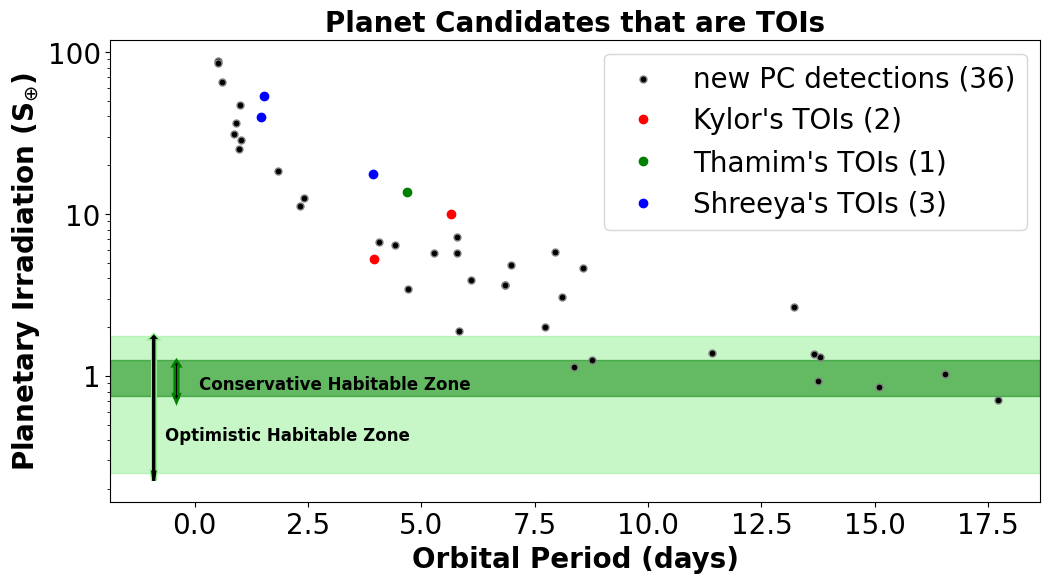

In [19]:
plt.figure(figsize=(12,6))
ms=10**2
plt.scatter(newPCs['Period (days)'],newPCs['Stellar Insolation (Earth Units)'],color='black',marker='.',edgecolor='grey',label="new PC detections ("+str(len(newPCs))+")",s=ms,zorder=10)


plt.plot(successful_PC_TOI_detections_K2['Period (days)'],successful_PC_TOI_detections_K2['Effective Stellar Flux Value'],'ro',label="Kylor's TOIs ("+str(len(successful_PC_TOI_detections_K2))+")")
plt.plot(successful_PC_TOI_detections_T2['Period (days)'],successful_PC_TOI_detections_T2['Effective Stellar Flux Value'],'go',label="Thamim's TOIs ("+str(len(successful_PC_TOI_detections_T2))+")")
plt.plot(successful_PC_TOI_detections_S2['Period (days)'],successful_PC_TOI_detections_S2['Effective Stellar Flux Value'],'bo',label="Shreeya's TOIs ("+str(len(successful_PC_TOI_detections_S2))+")")

plt.xlabel('Orbital Period (days)',fontsize=20,weight='bold')
plt.ylabel(r'Planetary Irradiation (S$_{\oplus}$)',fontsize=20,weight='bold')
plt.axhspan(ymin=1-0.75,ymax=1+0.75,color='lightgreen',alpha=0.5)
plt.axhspan(ymin=1-0.25,ymax=1+0.25,color='green',alpha=0.5)



xpos=0.1
plt.text(s='Conservative Habitable Zone',x=xpos, y=0.825,fontsize=12,weight='bold')
plt.arrow(xpos-.5, 0.75, 0, 0.45, head_width=0.05, head_length=0.03, linewidth=4, color='green', length_includes_head=True)
plt.arrow(xpos-.5, 0.75, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=4, color='green', length_includes_head=True)
plt.arrow(xpos-.5, 0.75, 0, 0.45, head_width=0.05, head_length=0.03, linewidth=0.5, color='black', length_includes_head=True)
plt.arrow(xpos-.5, 0.75, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=0.5, color='black', length_includes_head=True)

plt.text(s='Optimistic Habitable Zone',x=xpos-0.75, y=0.4,fontsize=12,weight='bold')
# plt.arrow(11, 0.45, 0, 1.25, head_width=0.05, head_length=0.075, linewidth=5, color='black', length_includes_head=True)
# plt.arrow(11, 0.45, 0, -0.175, head_width=0.05, head_length=0.0253, linewidth=5, color='black', length_includes_head=True)
plt.arrow(xpos-1, 0.25, 0, 1.5, head_width=0.05, head_length=0.03, linewidth=4, color='lightgreen', length_includes_head=True)
plt.arrow(xpos-1, 0.25, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=4, color='lightgreen', length_includes_head=True)
plt.arrow(xpos-1, 0.25, 0, 1.5, head_width=0.05, head_length=0.03, linewidth=2, color='black', length_includes_head=True)
plt.arrow(xpos-1, 0.25, 0, -0.025, head_width=0.05, head_length=0.03, linewidth=2, color='black', length_includes_head=True)

plt.tick_params(axis='both', labelsize=20)
plt.yscale('log')
plt.yticks([1,10,100])
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(loc='upper right',fontsize=20)
plt.title('Planet Candidates that are TOIs',fontsize=20,weight='bold')
# plt.savefig("Everyone's_habitable_zone_PCs.png",bbox_inches='tight')
plt.show()

In [20]:
print('done!')

done!


In [21]:
newPCs.loc[newPCs['Stellar Insolation (Earth Units)']<1.25]

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,author,Stellar Insolation,Stellar Insolation (Earth Units)
3,168726017,The bottom graph shows a very clear dip that is slightly cut off. Single transit event.,3.296454,15.084341,1.980360,9.627781,PC,"Sector 4, Sector 5",2,18.0511,62.231669,-31.481631,-51.195952,50.651869,3131.0,4.98299,0.185,0.214,13.8898,11.6203,14.517,13.0434,NaN,NaN,NaN,9.164,8.823,Kylor,1.101869e-17,0.852552
14,452989720,Noticible dip and the plots are scattered,2.669906,16.550058,2.887069,5.302239,PC,"Sector 17, Sector 18",2,38.2558,8.770342,59.885526,49.748397,39.877510,3203.0,4.94586,0.250,0.263,11.4054,12.7315,16.350,14.0839,NaN,NaN,NaN,10.401,10.166,Thamim,1.990292e-17,1.019586
24,417767357,There is a gap with the plots,1.341124,17.721464,1.137605,7.674631,PC,"Sector 18, Sector 19, Sector 24, Sector 25",4,20.8484,356.615783,74.569442,62.956034,54.255718,3251.0,5.03933,0.147,0.187,18.6353,11.9443,14.780,13.2649,NaN,NaN,NaN,9.847,9.553,Thamim,7.021805e-18,0.711515
25,387998188,"Stars in the background that contaminates the data, other graphs have huge gaps",1.354441,13.753415,2.844002,10.092395,PC,"Sector 16, Sector 17, Sector 18, Sector 24",4,27.3526,317.514712,66.250569,71.438877,21.087454,3143.0,5.02420,0.165,0.200,17.2346,12.6835,16.180,14.0684,NaN,NaN,NaN,10.283,10.033,Thamim,1.041965e-17,0.923021
26,31792609,Systematic error,0.702021,8.370398,1.338990,8.367677,PC,Sector 13,1,23.2888,289.268816,-30.322251,-7.994418,286.717434,2873.0,5.19440,0.136,0.179,40.0902,13.8258,17.420,15.4234,NaN,NaN,NaN,11.247,10.876,Thamim,1.029499e-17,1.138515
